### Exploratory Data Analysis and data pre-processing

Objective: Analysis of the Health Insurance Lead Prediction Dataset and pre-processing of the data for use in the project


In [1]:
#Importing most used modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import phik
sns.set_palette('viridis')

### 1. Loading the data

In [2]:
#loading the raw data
df = pd.read_csv("datasets/raw/Health Insurance Lead Prediction Raw Data.csv")
df

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


From the dataset info, here are the descriptive information of the columns:

 | Variable | Definition | 
 | --- | --- |
 | ID Unique | Identifier for a row | 
 | City_Code | Code for the City of the customers | 
 | Region_Code | Code for the Region of the customers | 
 | Accomodation_Type | Customer Owns or Rents the house | 
 | Reco_Insurance_Type | Joint or Individual type for the recommended insurance | 
 | Upper_Age | Maximum age of the customer | 
 | Lower_Age | Minimum age of the customer | 
 | Is_Spouse | If the customers are married to each other (in case of joint insurance) | 
 | Health_Indicator | Encoded values for health of the customer | 
 | Holding_Policy_Duration | Duration (in years) of holding policy (a policy that customer has already subscribed to with the company) | 
 | Holding_Policy_Type | Type of holding policy | 
 | Reco_Policy_Cat | Encoded value for recommended health insurance | 
 | Reco_Policy_Premium Annual | Premium  for the recommended health insurance | 
 | Response (Target) | 1 or 0 if the customer show interest in the recommended policy or not |

In [3]:
#ID column can be dropped
df.drop(columns=['ID'], inplace=True)
df.rename(columns = {'Health Indicator':'Health_Indicator'}, inplace = True)

In [4]:
#Checking types of data and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                50882 non-null  object 
 1   Region_Code              50882 non-null  int64  
 2   Accomodation_Type        50882 non-null  object 
 3   Reco_Insurance_Type      50882 non-null  object 
 4   Upper_Age                50882 non-null  int64  
 5   Lower_Age                50882 non-null  int64  
 6   Is_Spouse                50882 non-null  object 
 7   Health_Indicator         39191 non-null  object 
 8   Holding_Policy_Duration  30631 non-null  object 
 9   Holding_Policy_Type      30631 non-null  float64
 10  Reco_Policy_Cat          50882 non-null  int64  
 11  Reco_Policy_Premium      50882 non-null  float64
 12  Response                 50882 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 5.0+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Region_Code,50882.0,1732.788707,1424.081652,1.0,523.0,1391.0,2667.0,6194.0
Upper_Age,50882.0,44.856275,17.310271,18.0,28.0,44.0,59.0,75.0
Lower_Age,50882.0,42.738866,17.319375,16.0,27.0,40.0,57.0,75.0
Holding_Policy_Type,30631.0,2.439228,1.025923,1.0,1.0,3.0,3.0,4.0
Reco_Policy_Cat,50882.0,15.115188,6.340663,1.0,12.0,17.0,20.0,22.0
Reco_Policy_Premium,50882.0,14183.950069,6590.074873,2280.0,9248.0,13178.0,18096.0,43350.4
Response,50882.0,0.239947,0.427055,0.0,0.0,0.0,0.0,1.0


In [6]:
#Checking percent of NaN values
(df.isna().sum() / len(df)) * 100

City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health_Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [7]:
#Checking balance of target value
df['Response'].value_counts() / len(df) * 100

0    76.005267
1    23.994733
Name: Response, dtype: float64

In [8]:
#Checking if there are duplicate rows
df[df.duplicated()].shape

(0, 13)

### 2. Data Analysis
#### 2.1 Checking for correlations and statistically relevant features

In [9]:
#Checking the correlation of the data
df.corr().round(2)

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
Region_Code,1.00,-0.01,-0.01,0.01,-0.07,-0.01,0.00
Upper_Age,-0.01,1.00,0.92,0.14,0.03,0.79,0.00
Lower_Age,-0.01,0.92,1.00,0.12,0.02,0.62,-0.00
Holding_Policy_Type,0.01,0.14,0.12,1.00,0.08,0.12,0.01
Reco_Policy_Cat,-0.07,0.03,0.02,0.08,1.00,0.06,0.11
Reco_Policy_Premium,-0.01,0.79,0.62,0.12,0.06,1.00,0.01
Response,0.00,0.00,-0.00,0.01,0.11,0.01,1.00


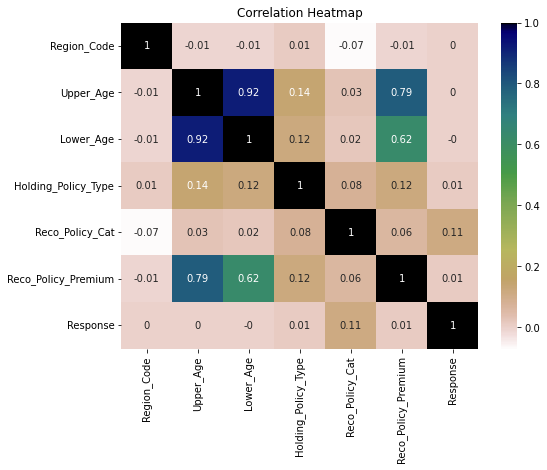

In [10]:
#Plotting the correlation matrix
plt.figure(figsize = (8,6))
sns.heatmap(df.corr().round(2), annot=True, cmap='gist_earth_r').set(title='Correlation Heatmap');

Aparently, from the numerical features the one more correlated to the response is the category of the policy recommended.

We can use the $\Phi_K$ (PhiK) correlation matrix to find possible correlations in the categorical variables before processing.

In [11]:
#Correlations using the 𝜙k (phi-k) matrix.
interval_cols = list(df._get_numeric_data().columns)
phik_matrix = df.phik_matrix(interval_cols = interval_cols)
phik_matrix

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
City_Code,1.000000,0.424883,0.228046,0.128042,0.241070,0.233354,0.122114,0.119192,0.183351,0.355218,0.503623,0.216918,0.000000
Region_Code,0.424883,1.000000,0.018516,0.020004,0.023406,0.014963,0.017596,0.027936,0.035292,0.039569,0.155283,0.030683,0.000000
Accomodation_Type,0.228046,0.018516,1.000000,0.304139,0.568576,0.502688,0.295456,0.127904,0.232629,0.230149,0.080038,0.473428,0.004132
Reco_Insurance_Type,0.128042,0.020004,0.304139,1.000000,0.320370,0.203250,0.982724,0.088294,0.083343,0.124979,0.040815,0.806581,0.013788
Upper_Age,0.241070,0.023406,0.568576,0.320370,1.000000,0.976992,0.284337,0.103069,0.357247,0.154263,0.072530,0.757116,0.019590
Lower_Age,0.233354,0.014963,0.502688,0.203250,0.976992,1.000000,0.164883,0.109438,0.313823,0.143680,0.083591,0.702981,0.008705
Is_Spouse,0.122114,0.017596,0.295456,0.982724,0.284337,0.164883,1.000000,0.110395,0.074634,0.138120,0.045328,0.706252,0.000000
Health_Indicator,0.119192,0.027936,0.127904,0.088294,0.103069,0.109438,0.110395,1.000000,0.029885,0.143580,0.085628,0.080725,0.000000
Holding_Policy_Duration,0.183351,0.035292,0.232629,0.083343,0.357247,0.313823,0.074634,0.029885,1.000000,0.161215,0.087694,0.242382,0.021558
Holding_Policy_Type,0.355218,0.039569,0.230149,0.124979,0.154263,0.143680,0.138120,0.143580,0.161215,1.000000,0.310628,0.123110,0.000000


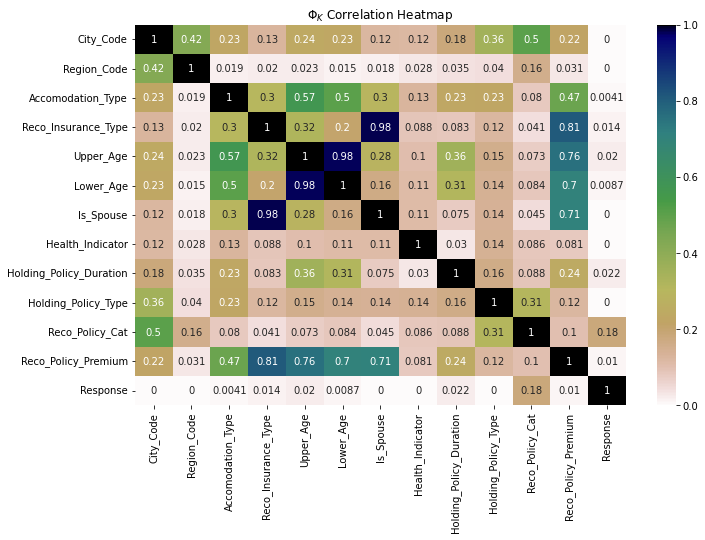

In [12]:
#Plotting the heatmap of the Phi-K correlation map
plt.figure(figsize = (11,7))
sns.heatmap(phik_matrix, annot=True, cmap='gist_earth_r').set(title=r'$\Phi_K$ Correlation Heatmap');

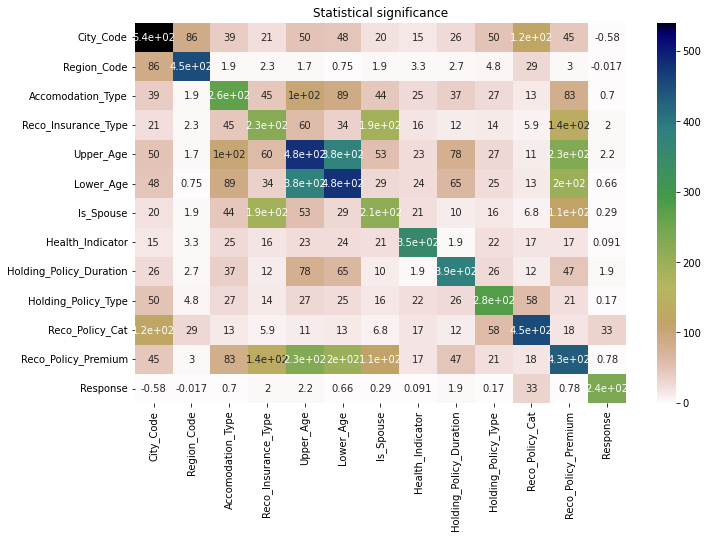

In [13]:
#Checking the statistical significance of the features
plt.figure(figsize = (11,7))
significance_matrix = df.significance_matrix(interval_cols=interval_cols).round(3).fillna(0)
sns.heatmap(significance_matrix, annot=True, cmap='gist_earth_r').set(title='Statistical significance');

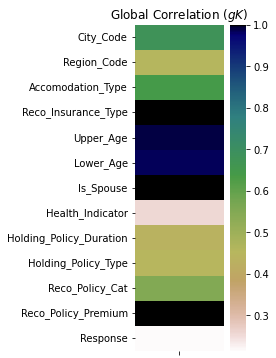

In [14]:
#PLotting the global correlation of the data
global_correlation, global_labels = df.global_phik(interval_cols=interval_cols)
plt.figure(figsize = (2,6))
sns.heatmap(global_correlation, xticklabels=[''], yticklabels=global_labels,cmap='gist_earth_r').set(title=r'Global Correlation ($gK$)');

So far the analysis of the data shows that while the data is highly correlated in the Policy Premium, even for the categorical variables.

Despite that, the highest correlation with the target variable (Response) is the category of the recomended policy.

#### 2.2 Analyzing the values

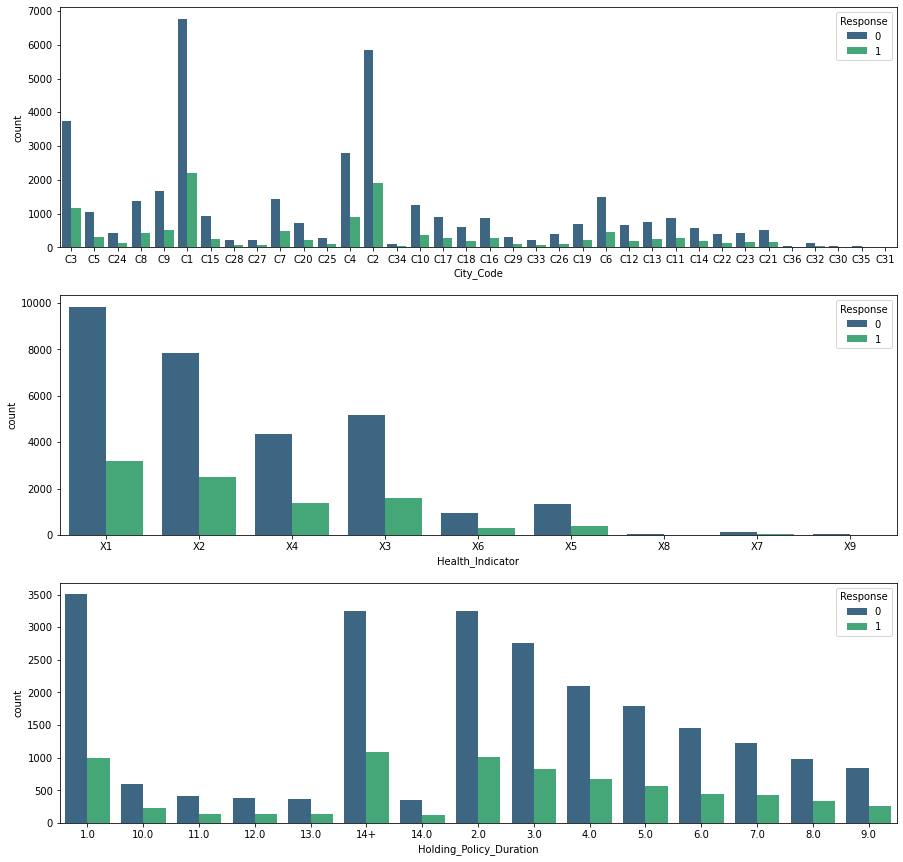

In [15]:
plt.figure(figsize = (15,15))
plt.subplot(3,1,1)
sns.countplot(x = 'City_Code', hue='Response',data = df, palette='viridis')
plt.subplot(3,1,2)
sns.countplot(x = 'Health_Indicator',  hue='Response', data = df, palette='viridis')
plt.subplot(3,1,3)
sns.countplot(x = 'Holding_Policy_Duration', hue='Response', data = df.sort_values(by=['Holding_Policy_Duration']), palette='viridis');

In [16]:
df['Health_Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health_Indicator, dtype: int64

There is no significant difference between the number of responses and the variable values in the categorical data.

Holding_Policy_Duration is actually a discrete numerical variable. Pandas interpeted it as an object because of the "14+" string.

Health_Indicator values are very unevenly distributed.

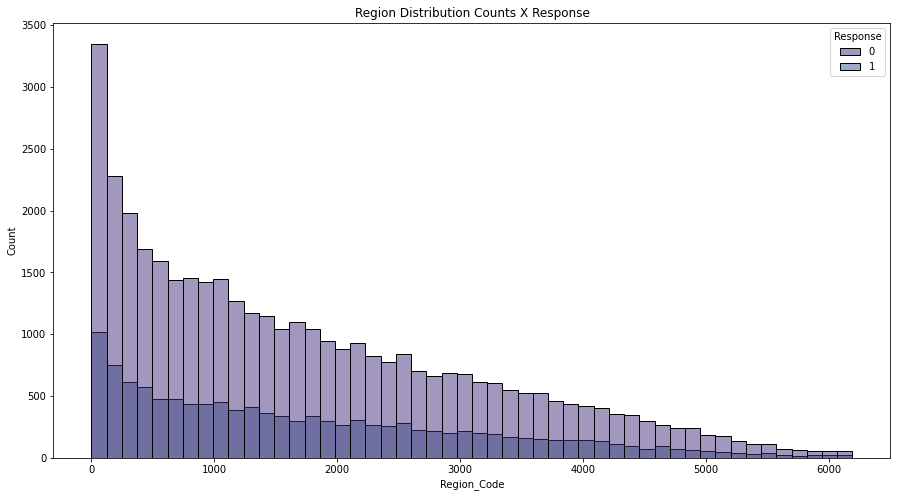

In [17]:
plt.figure(figsize = (15,8))
plot = sns.histplot(data=df, x='Region_Code', bins=50, hue='Response');
plt.title("Region Distribution Counts X Response")
plt.show()

Region distribution also doesn't show any signficiant variance in relation to the response value.

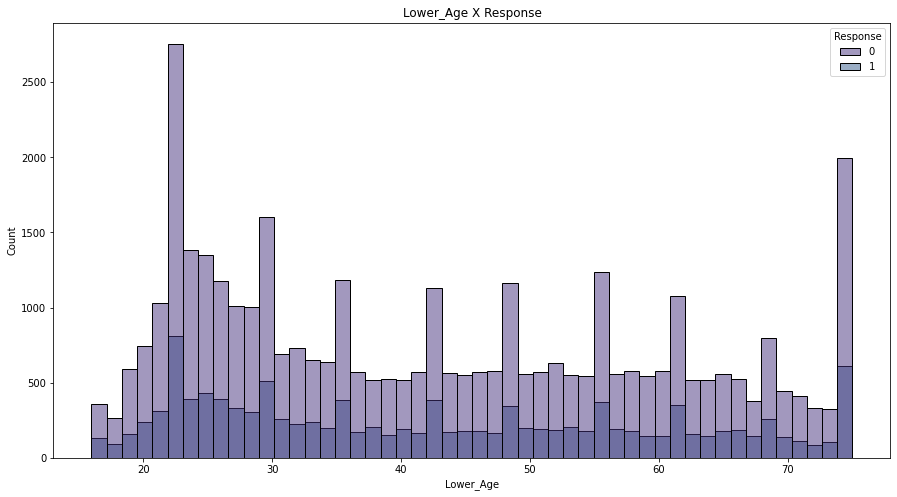

In [18]:
plt.figure(figsize = (15,8))
sns.histplot(data=df, x='Lower_Age', bins=50, hue='Response').set_title('Lower_Age X Response');

Region distribution also doesn't show any signficiant variance in relation to the response value.

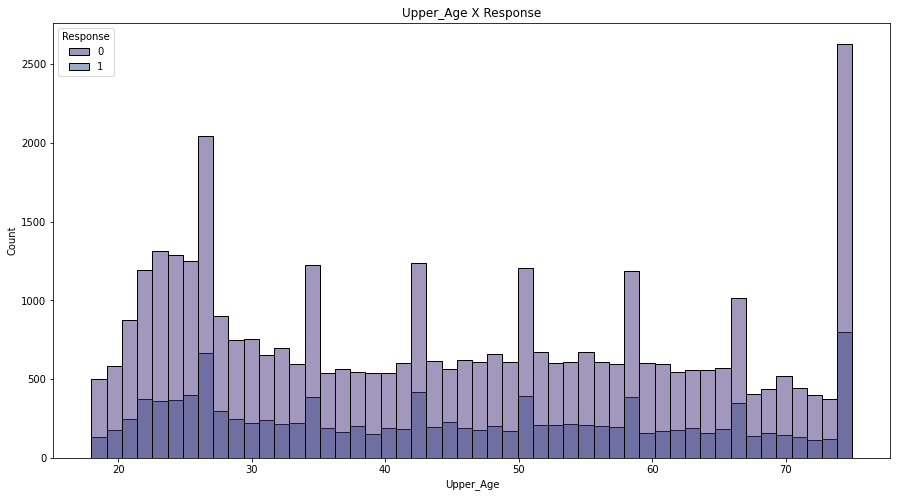

In [19]:
plt.figure(figsize = (15,8))
sns.histplot(data=df, x='Upper_Age', bins=50, hue='Response').set_title('Upper_Age X Response');

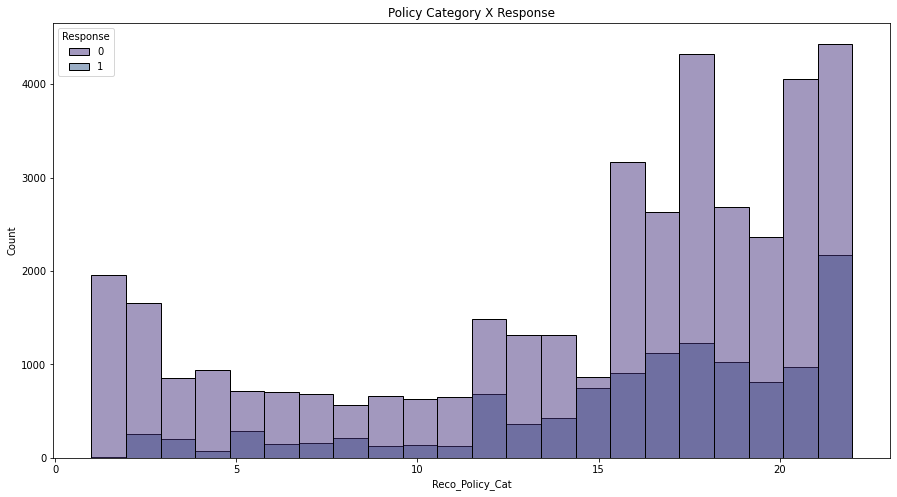

In [20]:
plt.figure(figsize = (15,8))
sns.histplot(data=df, x='Reco_Policy_Cat', bins=len(df['Reco_Policy_Cat'].unique()), hue='Response').set_title('Policy Category X Response');

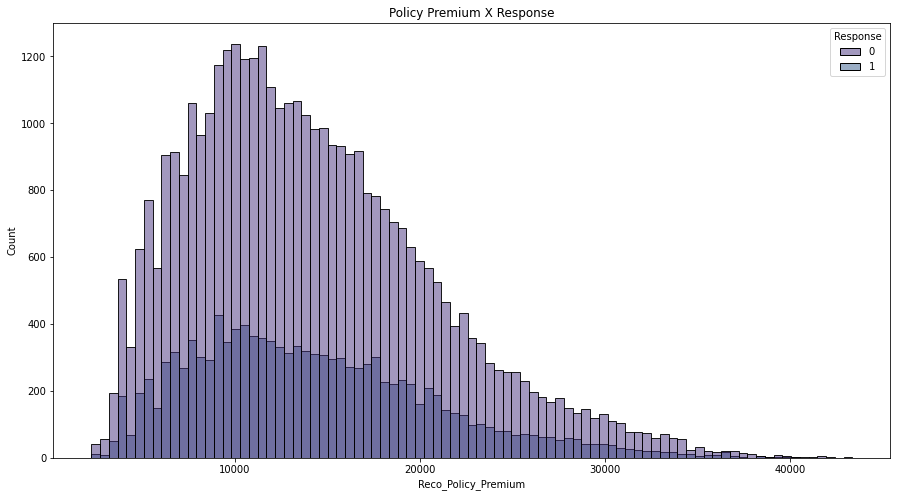

In [21]:
plt.figure(figsize = (15,8))
sns.histplot(data=df, x='Reco_Policy_Premium', hue='Response').set_title('Policy Premium X Response');

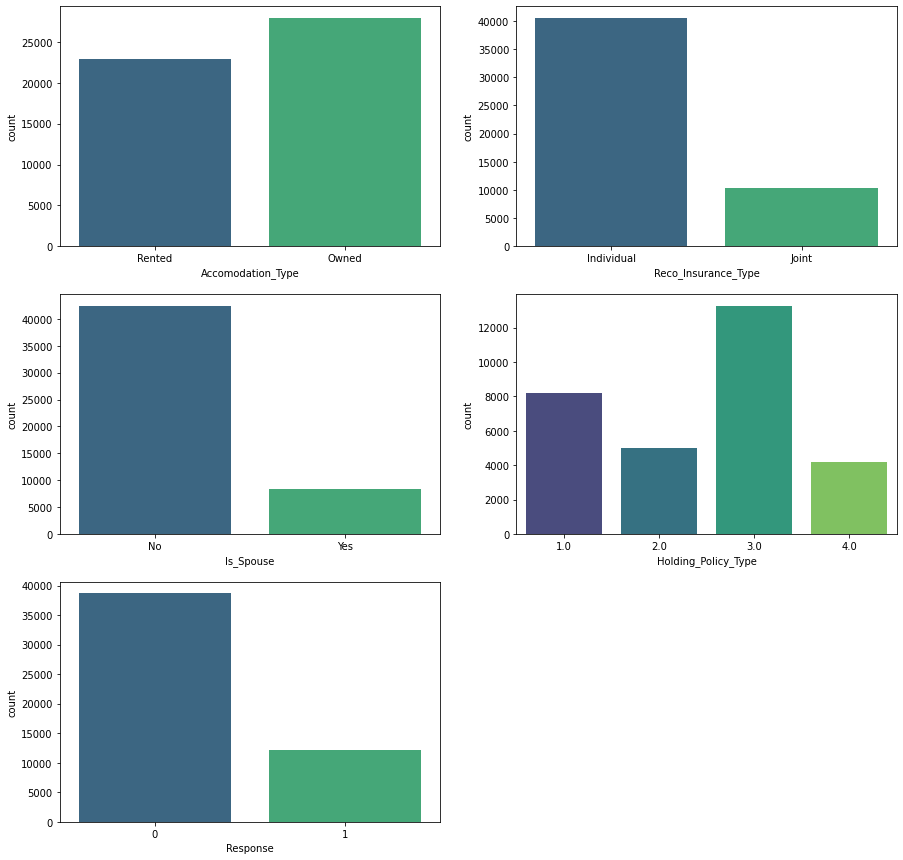

In [22]:
#Measuring the categorical variables
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'Accomodation_Type', palette='viridis', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'Reco_Insurance_Type', palette='viridis', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'Is_Spouse', palette='viridis', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'Holding_Policy_Type', palette='viridis', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'Response', palette='viridis', data = df);

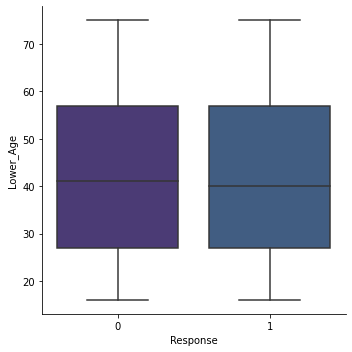

In [23]:
sns.catplot(x = 'Response', y="Lower_Age", kind="box", data=df);

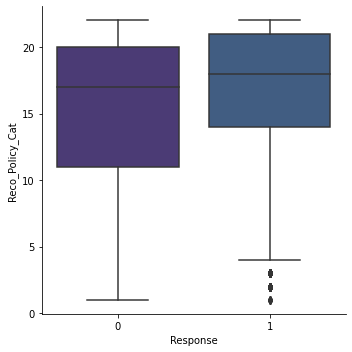

In [24]:
sns.catplot(x = 'Response', y="Reco_Policy_Cat", kind="box", data=df);

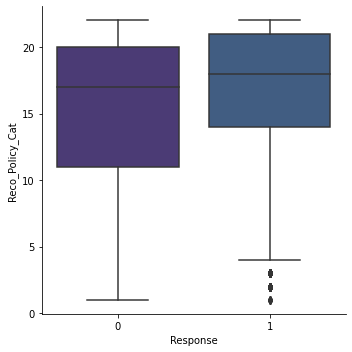

In [25]:
sns.catplot(x = 'Response', y="Reco_Policy_Cat", kind="box", data = df);

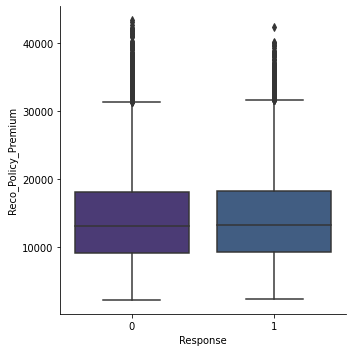

In [26]:
sns.catplot(x = 'Response', y="Reco_Policy_Premium", kind="box", data = df);

In [27]:
#Checking how many times Upper_Age and Lower_Age has the same value
same_rows = 0
for i in range(len(df)):
    if df.loc[i][4] == df.loc[i][5]:
        same_rows += 1

print(f'From the {df.shape[0]} rows of the dataset, Upper_Age equals Lower_Age {same_rows} ({(same_rows/df.shape[0])*100:.2f}%) times.')

From the 50882 rows of the dataset, Upper_Age equals Lower_Age 40536 (79.67%) times.


This explains why Upper_Age and Lower_Age are so correlated. Only 20,33% of the age values are different.

In [28]:
#Checking if the same values are missing from Holding_Policy_Duration and Holding_Policy_Type
both_na = 0
single_na = 0
for i in range(len(df)):
    if pd.isnull(df.loc[i]['Holding_Policy_Duration']) and pd.isnull(df.loc[i]['Holding_Policy_Type']):
        both_na += 1
    elif pd.isnull(df.loc[i]['Holding_Policy_Duration']) or pd.isnull(df.loc[i]['Holding_Policy_Type']):
        single_na += 1     
print(f'From the {both_na+single_na} NaN entries, {both_na} times both were missing, and {single_na} times only one was missing.')

From the 20251 NaN entries, 20251 times both were missing, and 0 times only one was missing.


This confirms that both values are always missing together.

Since this is to confirm a lead on a website a possible explanation is that this entry refers to someone that isn't a client of that insurance company yet.

Based on this ***assumption*** it may make more sense to fill the NaN values as 0 instead of another value (like median or mode).

#### 2.3 Pre-processing and feature engineering

*Is_Spouse*, *Reco_Insurance_Type*, *Accomodation_Type* are all categorical values with two options only.<br>
We can use one hot enconding to better process this data.

In [29]:
#Replacing Is_Spouse with 0 or 1
df['Is_Spouse'].replace(('Yes','No'), (1,0), inplace = True)

In [30]:
#Replacing Accomodation_Type with 0 or 1
df['Accomodation_Type'].replace(('Owned','Rented'), (0,1), inplace = True)
df.rename(columns = {'Accomodation_Type':'Has_Own_House'}, inplace = True)

In [31]:
#Replacing Reco_Insurance_Type with 0 or 1
df['Reco_Insurance_Type'].replace(('Individual', 'Joint'), (1,0), inplace = True)
df.rename(columns = {'Reco_Insurance_Type':'Reco_Individual_Insurance'}, inplace = True)

Instead of just dropping the *Upper_Age* column, we will create a new column named *Age_Gap*.<br>
While for most of the dataset these values are the same (Upper_Age = Lower_Age), for some cases there is a gap.<br>
This means that most of the times the insurance company is able to determine the correct age of the customer. <br>
However, by creating a new row when they aren't, we are able to store this information ("can we pinpoint the age of the customer?") in a less correlated data format, which may or may not improve further model training.

In [32]:
#Creating the Age_Gap column and dropping the Upper_Age
df['Age_Gap'] = df.apply(lambda row: row.Upper_Age - row.Lower_Age, axis = 1)
df.drop(columns=['Upper_Age'], inplace=True)
df.rename(columns = {'Lower_Age':'Age'}, inplace = True)

*Holding_Policy_Duration* is actually as discrete numeric value, but wasn't considered like that by Pandas because of the "14+" string in the data.

We can change "14+" to 15 to consider it a different numeric value than the rest.

It may skew the models a bit, but it's better than just binary encoding a lot of data and will also preserve the relation between the other values.

In [33]:
#Filling missing values with '0'
df['Holding_Policy_Type'].fillna(value=0, inplace = True)
df['Holding_Policy_Duration'].fillna(value=0, inplace = True)
df['Holding_Policy_Duration'].replace(('14+'), (15.0), inplace = True)

In [34]:
#Converting data types
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].astype('float64')
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].astype('int64')
df['Holding_Policy_Type'] = df['Holding_Policy_Type'].astype('float64')
df['Holding_Policy_Type'] = df['Holding_Policy_Type'].astype('int64')

Health_Indicator is a categoric value.

Of the available variables, the one that we can assume that is the best predictor about health is the age variable.
We will use the mode to fill the missing values.

In [35]:
df['Health_Indicator'].fillna(df['Health_Indicator'].mode()[0], inplace = True)
df['Health_Indicator']=df['Health_Indicator'].str.replace('X','') #We can just remove the 'X' so we end up with numeric values
df['Health_Indicator'] = df['Health_Indicator'].astype('int64')

In [36]:
#Changing city codes to numeric
df['City_Code']=df['City_Code'].str.replace('C','') #We can just remove the 'X' so we end up with numeric values
df['City_Code'] = df['City_Code'].astype('float64')
df['City_Code'] = df['City_Code'].astype('int64')

In [37]:
#Changing Reco_Policy_Premium to match other datatypes
df['Reco_Policy_Premium'] = df['Reco_Policy_Premium'].astype('int64')

In [38]:
#Reorganizing the dataset columns
df = df[['Age','Age_Gap','Has_Own_House','Is_Spouse','Reco_Individual_Insurance',
         'Reco_Policy_Premium','Holding_Policy_Duration','Holding_Policy_Type',
         'Health_Indicator','Reco_Policy_Cat','City_Code', 'Region_Code', 'Response']]

In [39]:
#Saving the all-numeric data before further processing
df.to_csv("datasets/lead_data_numeric.csv")